<a href="https://colab.research.google.com/github/Omaralon/Naruto-character-classification/blob/master/naruto_classification_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de personajes de Naruto utilizando Transfer Learning

## Objetivos

- Aprender y utilizar una técnica muy popular en Deep Learning para aquellas ocasiones en las que no tenemos suficiente información y queremos una respuesta rápida y eficaz en cuanto a tiempo de entrenamiento.
- Familiarizarse con herramientas utilizadas en el ámbito de Machine Learning como lo es Tensorflow.
- Probar el funcionamiento del aprendizaje por transferencia al utilizar un dataset de imágenes recopilado por nosotros.
- Conocer un poco del flujo y las técnicas para la clasificación de imágenes por medio de redes neuronales convolucionales.
- Informarse acerca de los diferentes modelos oficiales preentrenados por Google para aplicarlos en un ambiente móvil, en dónde el espacio y el poder computacional es más limitado.


## Introducción teórica 
<image src=https://cdn-images-1.medium.com/max/1600/1*9GTEzcO8KxxrfutmtsPs3Q.png width=700>

### ¿Qué es el Deep Learning?

<image src=https://www.smartpanel.com/wp-content/uploads/2018/04/evolucion-machine-learning-e1523271968363-1024x558.png width=700>

Deep Learning o aprendizaje profundo se define como un algoritmo automático estructurado o jerárquico que emula el aprendizaje humano con el fin de obtener ciertos conocimientos. Destaca porque no requiere de reglas programadas previamente, sino que el propio sistema es capaz de «aprender» por sí mismo para efectuar una tarea a través de una fase previa de entrenamiento. 

A su vez, también se caracteriza por estar compuesto por redes neuronales artificiales entrelazadas para el procesamiento de información. Se emplea principalmente para la automatización de análisis predictivos.


![](https://www.smartpanel.com/wp-content/uploads/2018/04/red-neuronas-artificiales.png)

Los algoritmos que componen un sistema de aprendizaje profundo se encuentra en diferentes capas neuronales compuestas por pesos (números). El sistema está dividido principalmente en 3 capas:

**1. Capa de entrada (Input Layer):** Está compuesto por las neuronas que asimilan los datos de entrada, como por ejemplo imagen o una tabla de datos.


**2. Capa oculta (Hidden Layer):** Es la red que realiza el procesamiento de información y hacen los cálculos intermedios. Cada más neuronas en esta capa haya, más complejos son los cálculos que se efectúan.


**3. Salida (Output Layer):** Es el último eslabón de la cadena, y es la red que toma la decisión o realizar alguna conclusión aportando datos de salida.

#### Ejemplo de Deep Learning
Suponiendo que queremos que una máquina sea capaz de identificar si hay algún perro dentro de una imagen. Para ello tendríamos que programar un algoritmo de una manera semejante a la explicación anterior, dividiendo las funciones de cada capa neuronal en un proceso de entrada, procesamiento y salida.

<img src=https://www.smartpanel.com/wp-content/uploads/2018/04/deep-learning-proceso.png width=700>

Para la **entrada de datos**, tendríamos que crear una capa que asimile la información introducida. En este caso, necesitaríamos que las neuronas desmembraran la imagen en píxeles, así, cada trozo de imagen se envía a las diferentes neuronas de la segunda capa.

Después, la **capa de segundo nivel** tiene como objetivo procesar cada uno de los pixeles delimitando los bordes dentro de los pixeles (separando los vectores dentro de los pixeles).

En el **tercer nivel** se combinarán los bordes para diseñar las formas, y constituir cada uno de los objetos de la imagen.

En la capa de **cuarto nivel**, se utilizan los filtros del sistema para reconocer qué objetos son perros, y cuáles no, cómo pueden ser tener cuatro patas, tener una cola y un hocico. Como último paso, la capa 4 traspasa los datos a la última capa, el cual combina las características identificadas para reconocerse si es un «perro» o no por medio de conclusiones parciales, es decir, este fragmento es una cola de un animal, por tanto sí puede ser un perro. Si tiene cuatro patas, sí tiene características de perro… así hasta entregar todos los fragmentos de información a la capa de salida y que este ofrezca una conclusión.

A grandes rasgos, puede decirse que el Deep Learning funciona reduciendo errores, y tratando de aumentar el intervalo de confianza. Si tuviéramos que basarnos solo en la segunda capa, se puede decir que el intervalo de confianza de que haya un perro es de 70%, luego, si lo procesa la tercera capa aumentaría hasta el 77%… Así hasta reducir el margen de error casi a 0.

Para que la máquina aprenda, tiene que pasar por un proceso didáctico el cual combina un aprendizaje supervisado (un humano etiqueta en la imagen que es un perro), y un aprendizaje no supervisado (la máquina encuentra sus propios patrones para establecer relaciones a partir de los datos aportados).

Cada más cerca esté la neurona de la capa de salida, más entrenamiento supervisado requerirá para perfeccionarse. Esto ocurre debido a que las primeras capas tratan de procesar los datos de modo que se puedan reconocer objetos complejos, en cambio, las capas más profundas requieren de mayor atención humana, ya que los cálculos son cada vez más complejos.



### ¿Qué es una red neuronal convolucional (CNN)?
Una red neuronal convolucional es un tipo de red multicapa que consta de diversas capas convolucionales y de pooling (submuestreo) alternadas, y al final tiene una serie de capas full-connected como una red perceptrón multicapa. La entrada de una red capa convolucional suele ser, generalmente, una imagen m x m x r, donde m es tanto la altura como el ancho de la imagen y r es el número de canales. Las capas convolucionales tienen k filtros (o kernels) cuyas dimensiones son n x n x q , donde  n y q son elegidas por el diseñador (generalmente q suele ser igual a r).

Cada filtro genera mediante convolución un mapa de rasgos o características de tamaño (m−n+1)  x (m-n+1) x p, siendo p el número de filtros que se desean usar. 
Después cada mapa es sub-muestreado en la capa de pooling con la operación “mean pooling” o “max pooling” sobre regiones contiguas de tamaño p x p donde p puede tomar valores desde 2 para imágenes pequeñas hasta, comúnmente, no más de 5 para imágenes grandes. Antes o después del submuestreo, se aplica una función de activación sigmoidal más un sesgo para cada mapa de rasgos. 


<image src=https://iaarhub.github.io/images/cnn.png width=800>

### Estructura de las Redes Neuronales Convolucionales

En general, las redes neuronales convolucionales van a estar construidas con una estructura que contendrá 3 tipos distintos de capas:

1. Una capa convolucional, que es la que le da el nombre a la red.


2. Una capa de reducción o de pooling, la cual va a reducir la cantidad de parámetros al quedarse con las características más comunes.


3. Una capa clasificadora totalmente conectada, la cual nos va dar el resultado final de la red.



#### Capa Convolucional

La operación de convolución recibe como entrada o input la imagen y luego aplica sobre ella un filtro o kernel que nos devuelve un mapa de las características de la imagen original, de esta forma logramos reducir el tamaño de los parámetros. La convolución aprovecha tres ideas importantes que pueden ayudar a mejorar cualquier sistema de machine learning, ellas son:

1. Interacciones dispersas, ya que al aplicar un filtro de menor tamaño sobre la entrada original podemos reducir drásticamente la cantidad de parámetros y cálculos.

2. Los parámetros compartidos, que hace referencia a compartir los parámetros entre los distintos tipos de filtros, ayudando también a mejorar la eficiencia del sistema

3. Las representaciones equivariante, que indican que si las entradas cambian, las salidas van a cambiar también en forma similar.

![](https://relopezbriega.github.io/images/conv_layer.png)

Por otra parte, la convolución proporciona un medio para trabajar con entradas de tamaño variable, lo que puede ser también muy conveniente.


#### Capa de reducción o pooling

La capa de reducción o pooling se coloca generalmente después de la capa convolucional. Su utilidad principal radica en la reducción de las dimensiones espaciales (ancho x alto) del volumen de entrada para la siguiente capa convolucional. No afecta a la dimensión de profundidad del volumen. La operación realizada por esta capa también se llama reducción de muestreo, ya que la reducción de tamaño conduce también a la pérdida de información. Sin embargo, una pérdida de este tipo puede ser beneficioso para la red por dos razones:

1. Disminución en el tamaño conduce a una menor sobrecarga de cálculo para las próximas capas de la red.

2. Reducir el sobreajuste.

![](https://relopezbriega.github.io/images/Max_pooling.png)

La operación que se suele utilizar en esta capa es max-pooling, que divide a la imagen de entrada en un conjunto de rectángulos y, respecto de cada subregión, se va quedando con el máximo valor.


#### Capa clasificadora totalemente conectada (Fully Connected Layer)

Al final de las capas convolucional y de pooling, las redes utilizan generalmente capas completamente conectadas en la que cada píxel se considera como una neurona separada al igual que en una red neuronal regular. Esta última capa clasificadora tendrá tantas neuronas como el número de clases que se debe predecir.


### ¿Qué es un bottleneck layer?


La idea principal detrás de un bottleneck layer (capa de cuello de botella) es reducir el tamaño del tensor de entrada en una capa convolucional con kernels más grandes que 1x1, reduciendo  el número de canales de entrada, también conocida como la profundidad del tensor de entrada.

La mayoría de las CNN están utilizando de una forma u otra las capas de cuello de botella. Esta técnica ayuda a mantener bajo el número de parámetros y, por lo tanto, el costo computacional.


![](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/10/Input-Output-layers-313x300.png)

Normalmente no se calculan directamente los pesos para las capas de cuello de botella, el proceso de training se encarga de eso, como para todos los demás pesos. Seleccionar un buen tamaño para una capa de cuello de botella es algo que se tiene que “adivinar”, y luego experimentar, para encontrar arquitecturas de red que funcionen bien. El objetivo aquí es generalmente encontrar una red que se generalice bien a las nuevas imágenes, y las capas de cuello de botella ayudan a reducir la cantidad de parámetros en la red al mismo tiempo que permiten que sea profunda y representan muchos mapas de características (feature maps).



### Arquitectura del modelo MobileNetV2

Los cuellos de botella de MobileNetV2 codifican las entradas y salidas intermedias, mientras que la capa interna encapsula la capacidad del modelo para transformarse de conceptos de nivel inferior, como píxeles, a descriptores de nivel superior, como categorías de imágenes. Con las conexiones residuales tradicionales, los accesos directos permiten un entrenamiento más rápido y una mayor precisión. 

![](https://analyticsindiamag.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-18-at-11.52.51-AM.png)

El bloque de construcción básico es una convolución separable en profundidad de cuello de botella con residuos. La arquitectura de MobileNetV2 contiene en su capa inicial completamente una convolución con 32 filtros, seguida de 19 capas de cuello de botella residuales. 

Los investigadores han adaptado la arquitectura a diferentes puntos de rendimiento, utilizando la resolución de imagen de entrada y el multiplicador de ancho como hiperparámetros ajustables, que pueden ajustarse según la precisión deseada o las compensaciones de rendimiento. La red primaria (multiplicador de ancho 1, 224 × 224), tiene un costo computacional de 300 millones de adiciones múltiples y utiliza 3.4 millones de parámetros. El costo computacional de la red varía de 7 sumas múltiples a 585M MAdds, mientras que el tamaño del modelo varía entre 1.7M y 6.9M parámetros.



### ¿Qué es Transfer Learning?

![](https://image.slidesharecdn.com/producttank-ai-braincreators-170412101012/95/deep-neural-networks-embeddings-and-transfer-learning-76-638.jpg?cb=1511526967)

El aprendizaje por transferencia es una técnica de aprendizaje automático en la que un modelo entrenado en una tarea se vuelve a utilizar en una segunda tarea relacionada.

La idea general de la transferencia de aprendizaje es utilizar los conocimientos aprendidos de las tareas para las que se dispone de una gran cantidad de datos etiquetados en configuraciones donde solo hay pocos datos etiquetados. Crear datos etiquetados es costoso, por lo que es clave aprovechar de manera óptima los conjuntos de datos existentes.

En un modelo tradicional de aprendizaje automático, el objetivo principal es generalizar datos invisibles basados ​​en patrones aprendidos de los datos de entrenamiento. Con la transferencia de aprendizaje, intenta iniciar este proceso de generalización a partir de patrones que ya se han aprendido para una tarea diferente. Esencialmente, en lugar de comenzar el proceso de aprendizaje desde una hoja en blanco, se comienza a partir de patrones que se han aprendido para resolver una tarea diferente.

<image src=http://ruder.io/content/images/2017/03/transfer_learning_setup.png width=700>

El aprendizaje por transferencia se relaciona con problemas como el aprendizaje de tareas múltiples y la deriva de conceptos, y no es exclusivamente un área de estudio para el aprendizaje profundo.

Sin embargo, el aprendizaje por transferencia es popular en el aprendizaje profundo, dados los enormes recursos necesarios para entrenar modelos de aprendizaje profundo o los conjuntos de datos grandes y desafiantes en los que se capacitan los modelos de aprendizaje profundo.

El aprendizaje por transferencia solo funciona en el aprendizaje profundo si las características del modelo aprendidas en la primera tarea son generales.


Un modelo pre-entrenado  es una red neuronal guardada que se entrenó previamente en un conjunto de datos grande, generalmente en una tarea de clasificación de imágenes a gran escala. Podemos usar el modelo pre-entrenado tal como es o transferir el aprendizaje usando los conventos pre-entrenados. La intuición detrás de transferencia de aprendizaje es que si este modelo se entrena en un conjunto de datos lo suficientemente grande y general, este modelo servirá efectivamente como un modelo genérico del mundo visual. Podemos aprovechar estos mapas de características aprendidas sin tener que entrenar un modelo grande en un conjunto de datos grande utilizando estos modelos como la base de nuestro propio modelo específico para nuestra tarea. *Hay 2 escenarios de aprendizaje por transferencia utilizando un modelo pre-entrenado:*

#### Feature Extraction (Extracción de características)

Este feature usa las representaciones de lo aprendido por una red neuronal anterior para extraer características significativas de nuevas muestras. Simplemente agregamos un nuevo clasificador, que se entrenará desde cero, sobre el modelo pre-entrenado para que podamos reutilizar los mapas de características aprendidos previamente para nuestro conjunto de datos.


#### Fine Tuning (Ajuste Preciso)

Ésta estrategia no solo consiste en reemplazar y volver a entrenar el clasificador en la parte superior de la CNN en el nuevo conjunto de datos, sino también ajustar los pesos de la red pre-entrenada al continuar la propagación hacia atrás. Es posible ajustar todas las capas de la CNN, o es posible mantener algunas de las capas anteriores fijas (debido a problemas de overfitting) y solo ajustar algunas partes de la red de nivel superior. Esto se debe a la observación de que las características anteriores de una CNN contienen más características genéricas (por ejemplo, detectores de bordes o detectores de manchas de color) que deberían ser útiles para muchas tareas, pero las capas posteriores de la CNN se vuelven progresivamente más específicas para los detalles de las clases contenidas en el dataset original. Por ejemplo, en el caso de ImageNet, que contiene muchas razas de perros, una gran parte de la magnitud de representación de nuestra CNN puede estar dedicado a características que son específicas para diferenciar entre razas de perros, usualmente se maneja en las últimas capas, que son las más especializadas.

<image src=https://www.oreilly.com/library/view/java-deep-learning/9781788997454/assets/74b69371-b7bf-47e7-8f0a-9ec9bde897ac.png width=700>


### Algoritmos de optimización más utilizados


#### Stochastic Gradient Descent (SGD)
Es un método de descenso de gradiente optimizado por la tasa de convergencia. La diferencia entre el método de gradiente tradicional es que los elementos se consideran por separado. El descenso de gradiente estocástico (SGD) se aproxima al gradiente utilizando solo un punto de datos. 

Por lo tanto, la evaluación del gradiente ahorra mucho tiempo en comparación con la suma de todos los datos. Esto es muy útil cuando se trabaja específicamente con grandes conjuntos de datos. Por lo tanto, el gradiente de la función de costo se calculará no para todos los elementos de la muestra, como se hace con el método tradicional de descenso de gradiente, sino para cada elemento por separado. 

El gradiente calculado para un elemento en particular se toma como una aproximación del gradiente real. 
Es importante entender que, a diferencia del método tradicional de descenso de gradiente, este algoritmo en cada paso puede no esforzarse por minimizar la función de costo, pero como resultado de un cierto número de pasos, la dirección general tenderá a este mínimo.


#### Momentum

Dado que el método SGD tiene problemas para navegar por los barrancos, es decir, áreas donde la superficie se curva mucho más en una dimensión que en otra, que son comunes alrededor de los óptimos locales. En estos escenarios, el SGD oscila a través de las pendientes del barranco, mientras que solo hace un progreso vacilante en la parte inferior hacia el óptimo local.

Momentum es un método que ayuda a acelerar el SGD en la dirección relevante y amortigua las oscilaciones. Esencialmente, cuando usamos el impulso, empujamos una bola cuesta abajo. La bola acumula impulso a medida que rueda cuesta abajo, volviéndose cada vez más rápida en el camino (hasta que alcanza su velocidad máxima). 

Lo mismo sucede con nuestras actualizaciones de parámetros: el término de momentum (impulso) aumenta para las dimensiones cuyos gradientes apuntan en las mismas direcciones y reduce las actualizaciones para las dimensiones cuyos gradientes cambian de dirección. Como resultado, ganamos una convergencia más rápida y una oscilación reducida.


#### Adam

La estimación del momento adaptativo (Adam)  es un método que calcula las tasas de aprendizaje adaptativo para cada parámetro. Además de almacenar un promedio de decaimiento exponencial de gradientes cuadrados, Adam también mantiene un promedio decreciente exponencial de gradientes pasados de manera similar al Momentum. 

Mientras que el Momentum puede verse como una bola que corre por una pendiente, Adam se comporta como una bola pesada con fricción, que por lo tanto prefiere mínimos planos en la superficie de error.  

Existen muchos otros algoritmos de optimización, cada uno con sus respectivas ventajas así como su desventajas, por lo tanto se enlistan los más comunes.

- Nesterov accelerated gradient
- Adagrad
- Adadelta
- RMSprop
- AdaMax
- Nadam
- AMSGrad


### Preprocesamiento de imágenes para enfocado en una CNN

Hay una serie de pasos de preprocesamiento de imágenes que debemos llevar a cabo antes de usar cualquier dataset de imágenes  en cualquier proyecto de Aprendizaje Profundo.

Los parámetros de entrada de datos de imagen más comunes son la cantidad de imágenes, la altura de la imagen, el ancho de la imagen, la cantidad de canales y la cantidad de niveles por píxel. Normalmente, tenemos 3 canales de datos correspondientes a los colores Rojo, Verde, Azul (RGB). Los niveles de píxel son generalmente [0,255]. 


#### Relación de aspecto uniforme
Uuno de los primeros pasos es garantizar que las imágenes tengan el mismo tamaño y relación de aspecto. La mayoría de los modelos de redes neuronales asumen una imagen de entrada de forma cuadrada, lo que significa que cada imagen debe verificarse si es un cuadrado o no, y recortarse de manera apropiada. Se puede recortar para seleccionar una parte cuadrada de la imagen, como se muestra. Mientras recortamos, generalmente nos importa la parte del centro.

![](https://cdn-images-1.medium.com/max/1600/1*PIHU_eTWhCUAPBb7-CDf4g.png)


#### Escalado de la imagen
Una vez que nos hemos asegurado de que todas las imágenes sean cuadradas (o tengan una relación de aspecto predeterminada), es el momento de escalar cada imagen de manera adecuada. Se tiene  que escalar el ancho y el alto de cada imagen en un factor adecuado para cada imagen. Existe una amplia variedad de técnicas de ampliación y reducción de escala, y usualmente se hace uso una función de biblioteca para hacer esto.


#### Media y Desviación estandar de los datos de entrada (imágenes)

A veces es útil observar la "imagen media" obtenida al tomar los valores medios de cada píxel en todos los ejemplos de entrenamiento. Observar esto podría darnos una idea de alguna estructura subyacente en las imágenes.

Por ejemplo, la imagen media de las primeras 100 de un dataset de prueba se muestra a continuación (*imagen izquierda*).

<image src=https://cdn-images-1.medium.com/max/1600/1*iADJswU5cpHZvkEPBbYFzg.png width=400>

Claramente, esto tiene la impresión suelta de una cara humana y permite concluir que las caras están algo alineadas con el centro y son de tamaño comparable. 

La desviación estándar de todas las imágenes se muestra a la derecha. Los valores de mayor varianza se muestran más blancos, por lo que vemos que las imágenes varían mucho en los límites en comparación con el centro.


#### Normalización de las entradas de la imagen

La normalización de los datos es un paso importante que garantiza que cada parámetro de entrada (píxel, en este caso) tenga una distribución de datos similar. Esto hace que la convergencia sea más rápida mientras se entrena la red. La normalización de los datos se realiza restando la media de cada píxel y luego dividiendo el resultado por la desviación estándar. La distribución de dichos datos se asemejaría a una curva gaussiana centrada en cero. Para las entradas de imágenes necesitamos que los números de píxeles sean positivos, por lo que se puede  elegir escalar los datos normalizados en el rango [0,1] o [0, 255]. 

> *Ejemplo de un dataset de 100 imágenes despues de aplicar la normalizacion a cada una de las imágenes:*
<image src=https://cdn-images-1.medium.com/max/1600/1*FnEVS0Gpj6rtaY-Z3kpXeQ.png width=500>

#### Reducción de la dimensionalidad

En ocasiones se puede optar por colapsar los canales RGB en un solo canal de escala de grises. A menudo hay consideraciones para reducir otras dimensiones, cuando se permite que el rendimiento de la red neuronal sea invariante a esa dimensión, o para hacer que el problema de entrenamiento sea más manejable.

![](https://cdn-images-1.medium.com/max/1600/1*zskFgRsuv7Iq2Jb7-jTxfA.png)

## Implementando Transfer Learning en base a una CNN entrenada con ImageNet



### Importando nuestro propio repositorio de imágenes desde Github

In [0]:
! git clone https://github.com/Omaralon/Naruto-character-classification.git

Cloning into 'Naruto-character-classification'...
remote: Enumerating objects: 556, done.
remote: Counting objects: 100% (556/556), done.
remote: Compressing objects: 100% (546/546), done.
remote: Total 556 (delta 10), reused 555 (delta 9), pack-reused 0
Receiving objects: 100% (556/556), 17.79 MiB | 28.87 MiB/s, done.
Resolving deltas: 100% (10/10), done.


### Importando bibliotecas importantes

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tf-nightly-gpu-2.0-preview
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
tf.__version__

'2.0.0-dev20190602'

### Verificando el contenido de nuestro dataset (labels y muestras)

In [0]:
ls Naruto-character-classification/Naruto_images

 Gaara/    Kakashi/   Orochimaru/  'Rock lee'/   Sasuke/
 Jiraya/   Naruto/    Pain/         Sakura/      Tsunade/


In [0]:
base_dir = './Naruto-character-classification/Naruto_images'

### Preprocesando nuestras imágenes
Nuestras imágenes que le alimentemos al modelo, como entradas, deben ser de 224x224 píxeles, es por eso que utilizamos nuestro **ImageDataGenerator** para reescalar las imágenes a ese tamaño y, además normalizamos los valores de cada pixel. De esta manera en el parámetro **rescale** especificamos que los valores serán en un rango de 0 a 1, en vez de pertenecer a un rango de 0 a 255. Ésto se hace para que nuestro modelo no maneje valores tan grandes y, por ende, no utilice tanto procesamiento. Lo que nos lleva a una convergencia más rápida.

Creamos un generator para el set de entrenamiento y otro para el set de evaluación, al cual le corresponde solamente el 20% de las imágenes de nuestro dataset. Al crear éstos objetos, especificamos el directorio en el que se encuentra nuestro dataset, el tamaño de la imagen y  tamaño del lote de imágenes que tendremos en cada iteración **(epoch)**.

In [0]:
IMAGE_SIZE = 224
BATCH_SIZE = 6

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 239 images belonging to 10 classes.
Found 57 images belonging to 10 classes.


En este caso tenemos un batch de 6 imágenes por iteración, el tamaño de cada imagen es ajustado a 224 x 224 porque nuestro modelo preentrenado MobileNet V2 ocupa como entradas, matrices de 224x224. Y como manejamos 3 canales RGB, aumenta el shape de nuestra matriz de input. A diferencia de si manejáramos imágenes en escala de grises, las cuales sólo ocupan un canal, como lo es en el caso del dataset MNIST.

In [0]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((6, 224, 224, 3), (6, 10))

### Guardando labels de nuestro modelo

- Por el momento solamente guardaremos los labels en un archivo **labels.txt** los cuales ocuparemos más adelante al convertir nuestro modelo a un formato de Tensorflow Lite

In [0]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)
  


{'Gaara': 0, 'Jiraya': 1, 'Kakashi': 2, 'Naruto': 3, 'Orochimaru': 4, 'Pain': 5, 'Rock lee': 6, 'Sakura': 7, 'Sasuke': 8, 'Tsunade': 9}


- Comprobamos que nuestro archivo de texto haya sido escrito correctamente.

In [0]:
!cat labels.txt

Gaara
Jiraya
Kakashi
Naruto
Orochimaru
Pain
Rock lee
Sakura
Sasuke
Tsunade

- En este caso utilizamos una red neuronal previamente entrenada. En donde especificamos que no queremos incluir la última capa (top) porque la útlima capa es la de salida, y nosotros queremos tener otras labels como salida de nuestro modelo al aplicar aprendizaje por transferencia.

- El motivo de que no incluyamos la capa del top es porque las últimas capas de una red neuronal son las que tienen características más especializadas acorde al problema para el cual se entrenó. Por lo que solo conservamos las capas anteriores porque éstas tienen características genéricas, como lo es el reconocimiento de bordes, manchas, líneas y patrones en general, que nos servirán para resolver problemas de clasificación de imágenes.

In [0]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

9412608/9406464 [==============================] - 1s 0us/step


### Feature extraction

You will freeze the convolutional base created from the previous step and use that as a feature extractor, add a classifier on top of it and train the top-level classifier.

Para efecutar un correcto feature extraction deberemos congelar nuestro modelo base convolucional (MobileNetV y los usaremos como un extractor de características, agregaremos un clasificador encima (una nueva capas con neuronas) y sólo entrenaremos a éste nuevo clasificador que habremos agregado en el nivel superior.

In [0]:
base_model.trainable = False

### Agregamos una última capa (head) clasificadora

In [0]:
# Agregaremos en la ultima capa una Dense Layer con un numero de nodos igual a 10, que son nuestras labels
num_classes = 10

new_model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),   # Creamos una Capa Convolutiva 2D con 32 filtros con un tamaño de 3x3 y con una funcion de activacion relu
  tf.keras.layers.Dropout(0.2),   # Esta capa nos ayuda a prevenir overfitting. El dropout de que se aplicara es del 20%
  tf.keras.layers.GlobalAveragePooling2D(),   # Aplicamos una capa de Average Pooling
  tf.keras.layers.Dense(num_classes, activation='softmax')  # La funcion de activacion de esta capa densa de salida es softmax
])

En nuestro caso nos basta con realizar el Feature Extraction en base al modelo MobileNetV2, esto es porque no contamos con suficientes imágenes como para poder realizar Fine tuning con lo que podríamos encontrar mejores pesos al ir actualizando diferentes capas de nuestro modelo base. 

> - Si hiciéramos Fine tuning con nuestro dataset, el cual es muy pequeño, lo más probable es que llegaríamos a un estado de Overfitting por no tener muchos datos de los cuales confiar.

### Compilamos el modelo

- Debemos de compilar el modelo antes de poder entrenarlo, en la compilación indicamos las métricas que utilizaremos en nuestro modelo.

- Elegimos como método de optimización un gradiente descendente estocástico **(SGD)**, una función de error o loss function como **crossentropy** para clasificación y nuestra métrica de validación fue de** precisión**.

---




In [0]:
new_model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 2,626,986
Trainable params: 369,002
Non-trainable params: 2,257,984
_________________________________________________________________


- Observamos que tenemos 2,626,986 parámetros en nuestro modelo completo, sin embargo sólo 369,002 son entrenables (los podemos actualizar) debido a que congelamos los pesos del modelo MobileNetV2 del cual nos estamos basando como fuente de conocimiento para el aprendizaje por transferencia. 

### Entrenamos nuestro nuevo clasificador

In [0]:
epochs = 5    # Elegimos 5 iteraciones porque contamos con 30 imagenes por personaje y nuestro batch size fue de 6

fit_stats = new_model.fit(train_generator, 
                    epochs=epochs, 
                    validation_data=val_generator)

W0603 03:13:43.224878 139710054885248 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
40/40 [==============================] - 39s 983ms/step - loss: 2.3702 - accuracy: 0.1883 - val_loss: 2.1244 - val_accuracy: 0.3333
Epoch 2/5
40/40 [==============================] - 30s 747ms/step - loss: 1.8804 - accuracy: 0.3264 - val_loss: 1.7490 - val_accuracy: 0.3684
Epoch 3/5
40/40 [==============================] - 30s 756ms/step - loss: 1.3069 - accuracy: 0.5690 - val_loss: 1.9445 - val_accuracy: 0.4035
Epoch 4/5
40/40 [==============================] - 30s 749ms/step - loss: 0.8664 - accuracy: 0.7448 - val_loss: 3.6971 - val_accuracy: 0.2105
Epoch 5/5
40/40 [==============================] - 30s 761ms/step - loss: 0.4497 - accuracy: 0.8368 - val_loss: 2.0290 - val_accuracy: 0.4211


### Gráficos del desempeño de la precisión y el error resultante

Gracias al códigod e arriba pudimos apreciar que al término de la 5ta iteración obtenemos una precisión del 83%, la cual es muy buena tomando en consideración el tamaño de nuestro dataset (muy pequeño), además de que todas las imágenes no son tan consitentes (no todas las imágenes de los personajes se muestran del mismo ángulo).

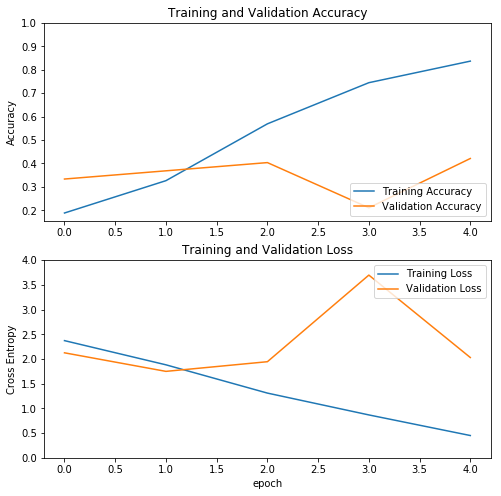

In [0]:
acc = fit_stats.history['accuracy']
val_acc = fit_stats.history['val_accuracy']

loss = fit_stats.history['loss']
val_loss = fit_stats.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,4.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

- Podemos apreciar que los valores de entrenamiento siempre siguen un comportamiento lineal.
- A medida que vamos avanzando en el número de iteración, la precisión de entrenamiento va incrementando y el error del entrenamiento va disminuyendo.

### Guardando nuestro modelo y convirtiéndolo a formato de TFLITE

In [0]:
saved_model_dir = 'save/'
tf.saved_model.save(new_model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [0]:
from google.colab import files

files.download('model_naruto_classif.tflite')
files.download('labels_naruto_classif.txt')

## Referencias

- https://stackoverflow.com/questions/54702212/keras-rescale-1-255-vs-preprocessing-function-preprocess-input-which-one-to
- https://stackoverflow.com/questions/55136609/keras-imagedatagenerator-rescale-values-to-0-5-0-5
- https://stackoverflow.com/questions/41758385/resizing-images-in-keras-imagedatagenerator-flow-methods
- https://stats.stackexchange.com/questions/262044/what-does-a-bottleneck-layer-mean-in-neural-networks
- https://towardsdatascience.com/speeding-up-convolutional-neural-networks-240beac5e30f
- https://towardsdatascience.com/neural-network-architectures-156e5bad51ba
- https://ai.stackexchange.com/questions/4864/what-is-the-concept-of-tensorflow-bottlenecks
- http://cs231n.github.io/transfer-learning/
- https://medium.com/@mehulved1503/feature-selection-and-feature-extraction-in-machine-learning-an-overview-57891c595e96
- https://blogs.nvidia.com/blog/2019/02/07/what-is-transfer-learning/
- https://machinelearningmastery.com/transfer-learning-for-deep-learning/
- https://www.datacamp.com/community/tutorials/transfer-learning
- https://machinethink.net/blog/mobilenet-v2/


